In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [ ]:
### step1: choosing invariant metrics: pageviews, clicks, click_through_probability

In [ ]:
### step2:analytical estimation of standard deviation for evaluation metrics before experiment ###

In [ ]:
# input baseline data #

# Unique cookies to view course overview page per day =
pageview= 40000

# Unique cookies to click "Start free trial" per day 
clicks= 3200

# Enrollments per day
enroll=660

#Click-through-probability on "Start free trial"
ctp=0.08

#Probability of enrolling, given click 
enroll_prob=0.20625

#Probability of payment, given enroll 
payment_enroll_prob=0.53

#Probability of payment, given click
payment_clicks_prob=0.1093125

# sample_size for analytical analysis before real experiment data
sample = 5000 # unit: pageviews

In [ ]:
## evaluation metrics
gross_conversion = round(enroll/clicks,4) # gross_conversion = enroll/clicks
retention = round(payment_enroll_prob,4) # retention = payment/enroll
net_conversion = round(payment_clicks_prob,4) # net_conversion = payment/clicks

In [ ]:
print('gross conversion baseline rate', gross_conversion)
print('retention baseline rate', retention)
print('net conversion baseline rate', net_conversion)

gross conversion baseline rate 0.2062
retention baseline rate 0.53
net conversion baseline rate 0.1093


In [ ]:
# calculating unit of analysis
clicks_gross=clicks*sample/pageview
enroll_retention=payment*sample/pageview
clicks_net=clicks*sample/pageview

In [ ]:
# calculate std for the three evaluation metrics, all the three evaluation metrics follow binomial distribution

std_gross_conversion= round(math.sqrt(gross_conversion*(1-gross_conversion)/clicks_gross),4)
std_retention=round(math.sqrt(retention*(1-retention)/enroll_retention),4)
std_net_conversion= round(math.sqrt(net_conversion*(1-net_conversion)/clicks_net),4)

In [209]:
print('std of gross_conversion baseline',std_gross_conversion)
print('std of retention baseline',std_retention)
print('std of net_conversion baseline',std_net_conversion)

std of gross_conversion baseline 0.0202
std of retention baseline 0.0549
std of net_conversion baseline 0.0156


In [ ]:
### step3: sizing

In [ ]:
# estimate pageview numbers needed 
# using sample size estimator: https://www.evanmiller.org/ab-testing/sample-size.html

In [ ]:
clicks_gross_sample=25835
users_retention_sample=39115
clicks_net_sample=27413

In [ ]:
pageveiw_gross_sample=clicks_gross_sample*pageview/clicks*2
pageveiw_retention_sample=users_retention_sample*pageview/enroll*2
pageveiw_net_sample=clicks_net_sample*pageview/clicks*2

In [213]:
print('pageview needed for gross_conversion',pageveiw_gross_sample)
print('pageview needed for retention',int(pageveiw_retention_sample))
print('pageview needed for net_conversion',pageveiw_net_sample)

pageview needed for gross_conversion 645875.0
pageview needed for retention 4741212
pageview needed for net_conversion 685325.0


In [ ]:
### Choosing Number of Samples given Power:

# The maximum pageview numbers needed to cover all the three metrics is 4741212, however it will take too much time to collect such
# big volume pagevies, so the next best number of pageview is 685325.0

In [ ]:
### Choosing Duration vs. Exposure

In [57]:
fraction = 1
duration=685325/40000

In [58]:
print('fraction of traffic devoted to experiment',fraction)
print('days needed for collecting choosing pageview numbers',round(duration,0))

fraction of traffic devoted to experiment 1
days needed for collecting choosing pageview numbers 17.0


In [ ]:
### step4: sanity check 

In [45]:
control=pd.read_csv('/content/sample_data/Final Project Results（副本） - Control.csv')

In [49]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


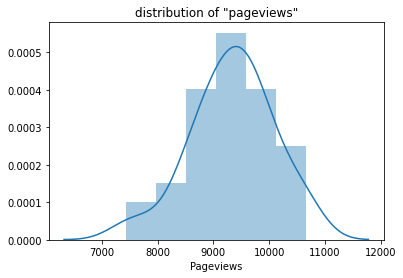

In [210]:
sns.distplot(control['Pageviews'])
plt.title('distribution of "pageviews"')
plt.show()

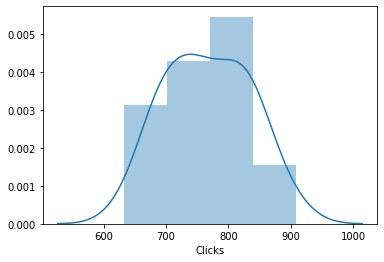

In [200]:
sns.distplot(control['Clicks'])

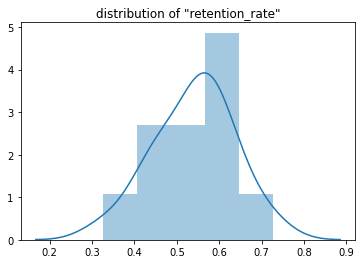

In [211]:
sns.distplot(control['Payments']/control['Enrollments'])
plt.title('distribution of "retention_rate"')
plt.show()

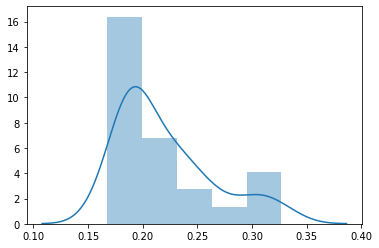

In [203]:
sns.distplot(control['Enrollments']/control[control['Enrollments'].notnull()]['Clicks'])

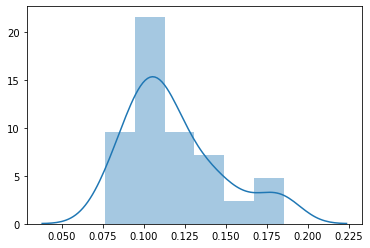

In [208]:
sns.distplot(control['Payments']/control[control['Payments'].notnull()]['Clicks'])

In [50]:
experiment=pd.read_csv('/content/sample_data/Final Project Results（副本） - Experiment.csv')

In [51]:
experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [ ]:
### sanity check of pageview and clicks of 'start free trial'

In [64]:
pageview_con=control['Pageviews'].sum()
clicks_con=control['Clicks'].sum()

In [65]:
pageview_exp=experiment['Pageviews'].sum()
clicks_exp=experiment['Clicks'].sum()

In [71]:
z_score=1.96 # 95% confidence level
std_pageview=round(math.sqrt(0.5*(1-0.5)/(pageview_con+pageview_exp)),4)
CI_pageview_up=0.5+std_pageview*z_score
CI_pageview_low=0.5-std_pageview*z_score

In [76]:
print('probability of pagevies in control group', round(pageveiw_con/(pageveiw_con+pageveiw_exp),4))
print('upper bound of pageview probability in control group', round(CI_pageview_up,4))
print('lower bound of pageview probability in control group', round(CI_pageview_low,4))
if round(pageveiw_con/(pageveiw_con+pageveiw_exp),4)>round(CI_pageview_low,4) and round(pageveiw_con/(pageveiw_con+pageveiw_exp),4)<round(CI_pageview_up,4):
  print('sanity check of pageviews: pass')
else:
  print('sanity check of pageviews: failed')

probability of pagevies in control group 0.5006
upper bound of pageview probability in control group 0.5012
lower bound of pageview probability in control group 0.4988
sanity check of pageviews: pass


In [77]:
std_clicks=round(math.sqrt(0.5*(1-0.5)/(clicks_con+clicks_exp)),4)
CI_clicks_up=0.5+std_clicks*z_score
CI_clicks_low=0.5-std_clicks*z_score

In [80]:
print('probability of clicks in control group', round(clicks_con/(clicks_con+clicks_exp),4))
print('upper bound of clicks probability in control group', round(CI_clicks_up,4))
print('lower bound of clicks probability in control group', round(CI_clicks_low,4))
if round(clicks_con/(clicks_con+clicks_exp),4)>round(CI_clicks_low,4) and round(clicks_con/(clicks_con+clicks_exp),4)<round(CI_clicks_up,4):
  print('sanity check of clicks: pass')
else:
  print('sanity check of clicks: failed')

probability of clicks in control group 0.5005
upper bound of clicks probability in control group 0.5041
lower bound of clicks probability in control group 0.4959
sanity check of clicks: pass


In [102]:
### sanity check of click through probability

In [99]:
d_hat_ctp=round(clicks_exp/pageview_exp-clicks_con/pageview_con,4)
p_pool_ctp=(clicks_con+clicks_exp)/(pageveiw_con+pageveiw_exp)
se_ctp=math.sqrt(p_pool_ctp*(1-p_pool_ctp)*(1/pageveiw_con+1/pageveiw_exp))
CI_ctp_up=0+se_ctp*z_score
CI_ctp_low=0-se_ctp*z_score

In [143]:
print('difference of ctp between control group and experiment group', d_hat_ctp)
print('upper bound of confidence interval', round(CI_ctp_up,4))
print('lower bound of confidence interval', round(CI_ctp_low,4))
if d_hat_ctp >round(CI_ctp_low,4) and d_hat_ctp<round(CI_ctp_up,4):
  print('sanity check of click through probability: pass')
else:
  print('sanity check of click through probability: failed')

difference of ctp between control group and experiment group 0.0001
upper bound of confidence interval 0.0013
lower bound of confidence interval -0.0013
sanity check of click through probability: pass


In [103]:
### step5: effect size test

In [ ]:
### test of gross_conversion

In [133]:
control['Enrollments'].notnull().sum()

23

In [108]:
control[control['Enrollments'].notnull()]['Date']

0     Sat, Oct 11
1     Sun, Oct 12
2     Mon, Oct 13
3     Tue, Oct 14
4     Wed, Oct 15
5     Thu, Oct 16
6     Fri, Oct 17
7     Sat, Oct 18
8     Sun, Oct 19
9     Mon, Oct 20
10    Tue, Oct 21
11    Wed, Oct 22
12    Thu, Oct 23
13    Fri, Oct 24
14    Sat, Oct 25
15    Sun, Oct 26
16    Mon, Oct 27
17    Tue, Oct 28
18    Wed, Oct 29
19    Thu, Oct 30
20    Fri, Oct 31
21     Sat, Nov 1
22     Sun, Nov 2
Name: Date, dtype: object

In [ ]:
# because the data of enrollment and payment only covers data from Oct-11 to Nov-2, 
# when caculating effect size test, we also only caculate clicks in this time span

In [123]:
clicks_con2=control[control['Enrollments'].notnull()]['Clicks'].sum()
clicks_exp2=experiment[experiment['Enrollments'].notnull()]['Clicks'].sum()
enroll_con=control['Enrollments'].sum()
enroll_exp=experiment['Enrollments'].sum()

In [130]:
d_min_gross=0.01
d_hat_gross=enroll_exp/clicks_exp2-enroll_con/clicks_con2
p_pool_gross=(enroll_con+enroll_exp)/(clicks_con2+clicks_exp2)
se_pool_gross=math.sqrt(p_pool_gross*(1-p_pool_gross)*(1/clicks_exp2+1/clicks_con2))
CI_gross_conversion_up=d_hat_gross+se_pool_gross*z_score
CI_gross_conversion_low=d_hat_gross-se_pool_gross*z_score

In [189]:
print('difference of gross_conversion between control group and experiment group:', d_hat_gross)
print('upper bound of gross_conversion confidence interval:', round(CI_gross_conversion_up,4))
print('lower bound of gross_conversion confidence interval:', round(CI_gross_conversion_low,4))
if 0 >round(CI_gross_conversion_up,4) or 0<round(CI_gross_conversion_low,4):
  print('CI did not include 0,change of gross_conversion stastistic significant: True')
else:
  print('CI did includes 0, change of gross_conversion stastistic significant: False')

if round(CI_gross_conversion_up,4)>d_min_retention and d_min_retention > round(CI_gross_conversion_low,4):
  print('CI includes d_min_retention,change of gross_conversion practical significant: False')
else:
  print('CI did includes d_min_gross, change of gross_conversion practical significant: True')


difference of gross_conversion between control group and experiment group: -0.020554874580361565
upper bound of gross_conversion confidence interval: -0.012
lower bound of gross_conversion confidence interval: -0.0291
CI did not include 0,change of gross_conversion stastistic significant: True
CI did includes d_min_gross, change of gross_conversion practical significant: True


In [ ]:
### test of retention rate

In [136]:
payment_con=control['Payments'].sum()
payment_exp=experiment['Payments'].sum()

In [137]:
d_min_retention=0.01
d_hat_retention=payment_exp/enroll_exp-payment_con/enroll_con
p_pool_retention=(payment_con+payment_exp)/(enroll_exp+enroll_con)
se_pool_retention=math.sqrt(p_pool_retention*(1-p_pool_retention)*(1/enroll_con+1/enroll_exp))
CI_retention_up=d_hat_retention+se_pool_retention*z_score
CI_retention_low=d_hat_retention-se_pool_retention*z_score

In [185]:
print('difference of retention between control group and experiment group:', d_hat_retention)
print('upper bound of retention difference confidence interval:', round(CI_retention_up,4))
print('lower bound of retention difference confidence interval:', round(CI_retention_low,4))
if 0 >round(CI_retention_up,4) or 0<round(CI_retention_low,4):
  print('CI did not include 0,change of retention stastistic significant: True')
else:
  print('CI did includes 0, change of retention stastistic significant: False')

if round(CI_retention_up,4)>d_min_retention or d_min_retention<abs(round(CI_retention_down,4)):
  print('CI includes d_min_retention,change of gross_conversion practical significant: False')
else:
  print('CI did includes d_min_retention, change of gross_conversion practical significant: True')

difference of retention between control group and experiment group: 0.031094804707142765
upper bound of retention difference confidence interval: 0.0541
lower bound of retention difference confidence interval: 0.0081
CI did not include 0,change of retention stastistic significant: True
CI includes d_min_retention,change of gross_conversion practical significant: False


In [ ]:
### test of net conversion

In [151]:
d_min_net=0.0075
d_hat_net=payment_exp/clicks_exp2-payment_con/clicks_con2
p_pool_net=(payment_con+payment_exp)/(clicks_exp2+clicks_con2)
se_pool_net=math.sqrt(p_pool_net*(1-p_pool_net)*(1/clicks_con2+1/clicks_exp2))
CI_net_up=d_hat_net+abs(se_pool_net)*z_score
CI_net_low=d_hat_net-abs(se_pool_net)*z_score

In [178]:
print('difference of net_conversion between control group and experiment group:', d_hat_net)
print('upper bound of net_conversion confidence interval:', round(CI_retention_up,4))
print('lower bound of net_conversion confidence interval:', round(CI_retention_low,4))
if 0 >round(CI_net_up,4) or 0<round(CI_net_low,4):
  print('CI did not include 0,change of net_conversion stastistic significant: True')
else:
  print('CI did includes 0, change of net_conversion stastistic significant: False')

if round(CI_net_up,4)>d_min_net or -d_min_net<round(CI_net_low,4):
  print('CI includes d_min_retention,change of net_conversion practical significant: True')
else:
  print('CI did includes d_min_retention, change of net_conversion practical significant: False')

difference of net_conversion between control group and experiment group: -0.0048737226745441675
upper bound of net_conversion confidence interval: 0.0541
lower bound of net_conversion confidence interval: 0.0081
CI did includes 0, change of net_conversion stastistic significant: False
CI did includes d_min_retention, change of net_conversion practical significant: False


In [ ]:
### step6: sign test

In [205]:
from scipy.stats import binom_test 
"""gross_conversion"""

alpha=0.05
beta=0.2

gc_exp=[i/j for i,j in zip(experiment['Enrollments'].to_list(),experiment['Clicks'].to_list())]
gc_cont=[i/j for i,j in zip(control['Enrollments'].to_list(),control['Clicks'].to_list())]
gc_diff=sum([i>j for i,j in zip(gc_exp,gc_cont)])
days=len(gc_exp)

# The prob of gross conversion of experiment group > gross conversion of control group is 0.5
p_value=binom_test(gc_diff, n=days, p=0.5)
print("p-value:",p_value,", Statistically Significant:",p_value<alpha)

p-value: 1.0843941709026694e-06 , Statistically Significant: True


In [206]:
"""retention"""
rt_exp=[i/j for i,j in zip(experiment['Payments'].to_list(),experiment['Enrollments'].to_list())]
rt_cont=[i/j for i,j in zip(control['Payments'].to_list(),control['Enrollments'].to_list())]
rt_diff=sum([i>j for i,j in zip(rt_exp,rt_cont)])
days=len(rt_exp)
p_value=binom_test(rt_diff, n=days, p=0.5)
print("p-value:",p_value,", Statistically Significant:",p_value<alpha)

p-value: 0.09887174959294497 , Statistically Significant: False


In [207]:
"""net conversion"""
nc_exp=[i/j for i,j in zip(experiment['Payments'].to_list(),experiment['Clicks'].to_list())]
nc_cont=[i/j for i,j in zip(control['Payments'].to_list(),control['Clicks'].to_list())]
nc_diff=sum([i>j for i,j in zip(nc_exp,nc_cont)])
days=len(nc_exp)
p_value=binom_test(nc_diff, n=days, p=0.5)
print("p-value:",p_value,", Statistically Significant:",p_value<alpha)


p-value: 0.007632078602910038 , Statistically Significant: True
